# This notebook shows the frames and landmarks of a video

In [1]:
import os, sys, matplotlib.pyplot as plt, cv2, numpy as np

# Import library with current code functions
sys.path.append(os.path.join("..", "lib"))
import manual_labeler_functions as man_lab_fun, general_functions as gf, files_paths as fp

## Defining some functions

In [2]:
class RangeError(ValueError):
    def __init__(self, message):
        self.message = message
        super().__init__(self.message)

def test_range(start_frame, end_frame):
    if end_frame < start_frame:
        raise RangeError("Error: start frame must be less than end frame.")
    else:
        return True

In [3]:
# Function to display the video frames individually
def DISPLAY_FRAMES(frames, start_frame=None, end_frame=None, max_col=5, DISPLAY_ALL_FRAMES=False):

    if DISPLAY_ALL_FRAMES:
        frames_range = frames
    else:
        frames_range = {numero_frame: frame for numero_frame, frame in frames.items() if start_frame <= numero_frame <= end_frame}
    #loop to display images 
    n_rows = (len(frames_range) + max_col-1) // max_col
    fig_width = 15
    fig_height  = 1 * (end_frame-start_frame+1)
    #plt.figure(figsize=(fig_width, fig_height))
    plt.figure(figsize=(fig_width, fig_height))
    for i, (frame_number, frame) in enumerate(frames_range.items()):
        plt.subplot(n_rows, max_col, i+1)
        plt.imshow(frame)
        plt.text(0,-10,f"frame: {frame_number}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [4]:
# Function to display the video frames with it landmarks individually
def DISPLAY_FRAMES_LANDMARKS(frames, VD_FEATURES, start_frame=None, end_frame=None, max_col=5, DISPLAY_ALL_FRAMES=False):

    if DISPLAY_ALL_FRAMES:
        frames_range = frames
        landmarks_range = VD_FEATURES
    else:
        if test_range(start_frame, end_frame):
            frames_range = {numero_frame: frame for numero_frame, frame in frames.items() if start_frame <= numero_frame <= end_frame}
            landmarks_range = VD_FEATURES.query("frame_seq >= @start_frame & frame_seq <= @end_frame")
        
    #Loop to display images 
    n_rows = (len(frames_range) + max_col-1) // max_col
    fig_width = 15
    fig_height  = 1 * (end_frame-start_frame+1)
    plt.figure(figsize=(fig_width, fig_height))
    for i, (frame_number, frame) in enumerate(frames_range.items()):
        landmarks = landmarks_range.iloc[i]
        refImgPts = np.array([eval(coord) for coord in landmarks[6:]])
        
        for ref in refImgPts:
            cv2.circle(frame, (int(ref[0]), int(ref[1])), 1, (0,255,0), thickness=1)

        x1 = np.min(refImgPts[:, 0])
        y1 = np.min(refImgPts[:, 1])
        x2 = np.max(refImgPts[:, 0])
        y2 = np.max(refImgPts[:, 1])
        
        frame_croped = frame[y1:y2, x1:x2]
        plt.subplot(n_rows, max_col, i+1)
        plt.imshow(frame_croped)
        plt.text(0,-10,f"frame: {frame_number}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [5]:
# Function to display only the landmarks for each frame individually
def DISPLAY_LANDMARKS(VD_FEATURES, start_frame=None, end_frame=None, max_col=5, DISPLAY_ALL_FRAMES=False):

    if DISPLAY_ALL_FRAMES:
        landmarks_range = VD_FEATURES
    else:
        if test_range(start_frame, end_frame):
            landmarks_range = VD_FEATURES.query("frame_seq >= @start_frame & frame_seq <= @end_frame")
            
    len_range = len(landmarks_range)
    n_rows = (len_range + max_col-1) // max_col
    
    plt.figure(figsize=(15, n_rows*3))
    for i, (frame_number, row) in enumerate(landmarks_range.iterrows()):
        plt.subplot(n_rows, max_col, i+1)
        shape = np.array([eval(coord) for coord in row[6:]])
        x = shape[:, 0] 
        y = shape[:, 1]
    
        plt.scatter(x, y, c='black', marker='o', s=10)
        plt.text(0, 1.05, f"frame: {row.frame_seq}", transform=plt.gca().transAxes,
                 horizontalalignment='center', verticalalignment='bottom')
        plt.gca().invert_yaxis()
        plt.axis('off')
           
    plt.tight_layout()
    plt.show()  

## Selects the video for analysis and CSV data file

In [6]:
# D for local video or Y for online video
ORIGIN = "D"
VIDEO_ID = 1

VD_INFO = gf.READ_CSV_FILE(gf.get_video_path(ORIGIN, VIDEO_ID, fp.VD_INFO))
VD_FEATURES_L1 = gf.READ_CSV_FILE(gf.get_video_path(ORIGIN, VIDEO_ID, fp.VD_FEATURES_L2))
VD_FEATURES_L2 = gf.READ_CSV_FILE(gf.get_video_path(ORIGIN, VIDEO_ID, fp.VD_FEATURES_L2))

## Loads frames from the selected video for further image analysis 

In [7]:
if ORIGIN == "Y":
    video_name = VD_INFO.link_video[0]
    video_frames = man_lab_fun.LOAD_VIDEO_FRAMES(gf.get_best_url(video_name))
elif ORIGIN == "D":
    VIDEO_EXT = '.mp4'
    video_name = VD_INFO.link_video[0]
    video_path = os.path.join(fp.VIDEO_SOURCE_LOCAL, VD_INFO.link_video[0] + VIDEO_EXT)
    video_frames = man_lab_fun.LOAD_VIDEO_FRAMES(str(video_path))
else: print("Invalid Origin")

Error opening video


## Select the crop interval

In [8]:
start_frame_crop = 0
end_frame_crop = 15
n_frames_per_row = 4

## Displays frames for image analysis

In [9]:

DISPLAY_FRAMES(video_frames, start_frame_crop, end_frame_crop, n_frames_per_row)

<Figure size 1500x1600 with 0 Axes>

## Show frames landmarks (features)

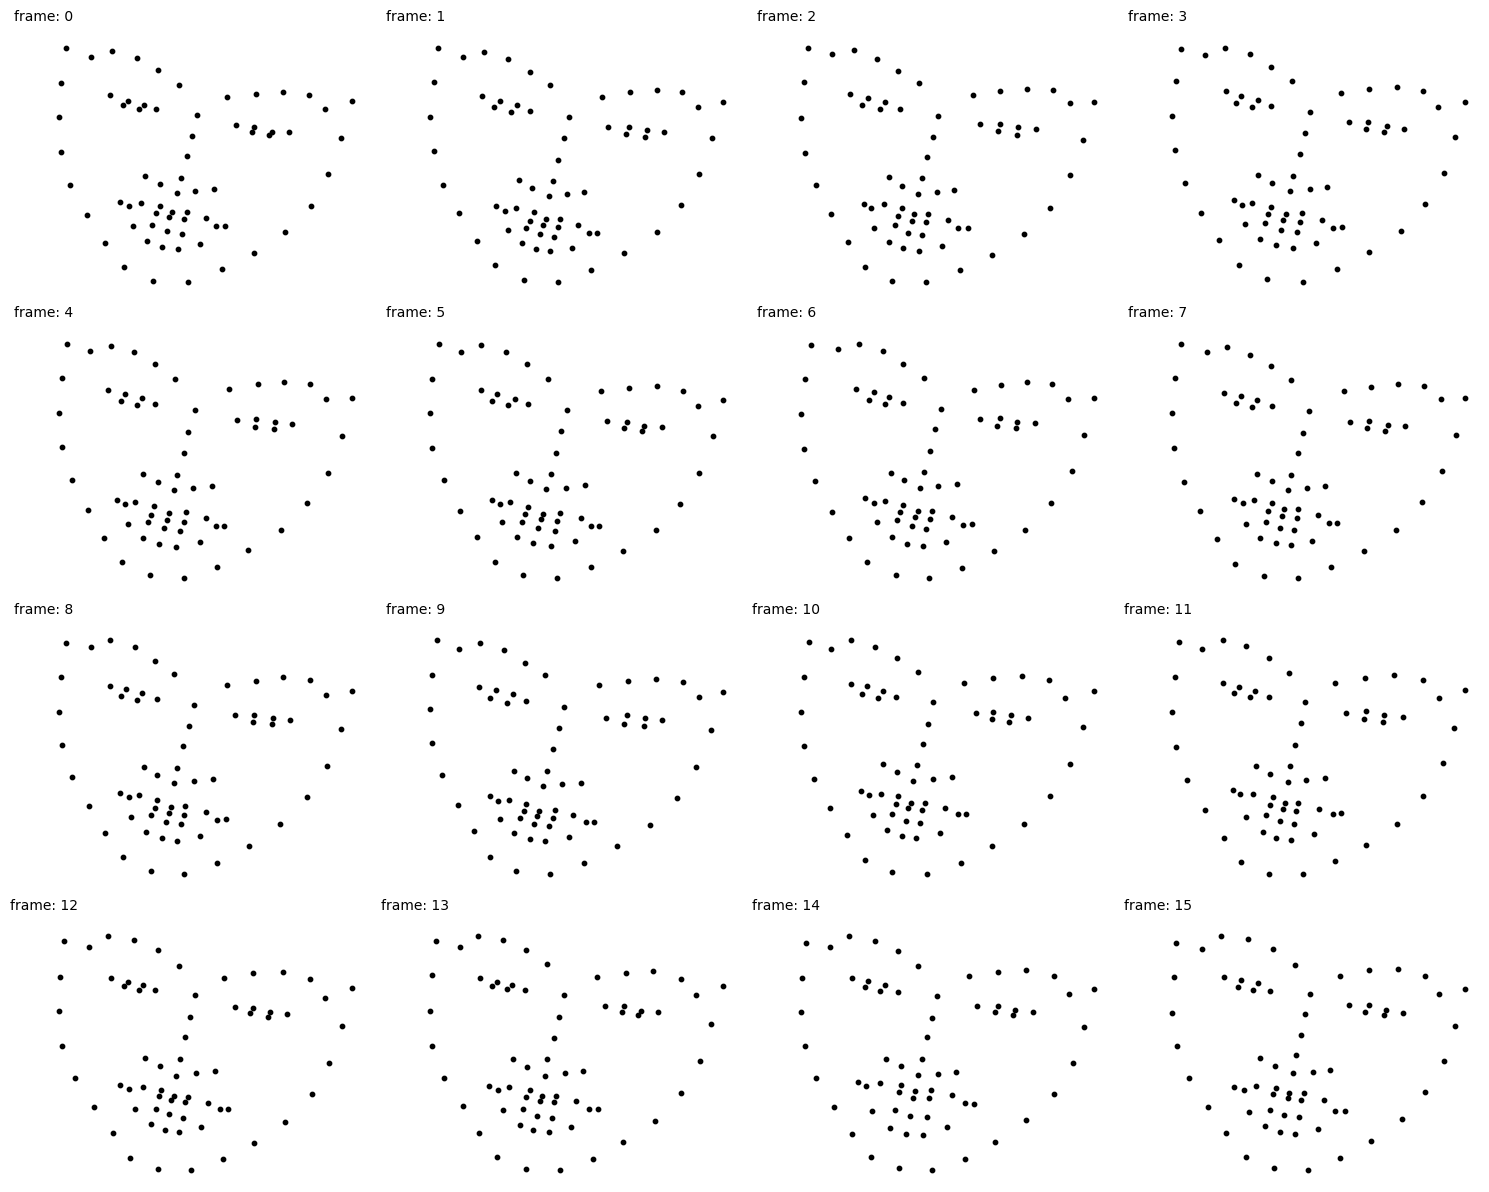

In [10]:
DISPLAY_LANDMARKS(VD_FEATURES_L2, start_frame_crop, end_frame_crop, n_frames_per_row)

## Show landmarks captured on each frame

In [11]:
DISPLAY_FRAMES_LANDMARKS(video_frames, VD_FEATURES_L2, start_frame_crop, end_frame_crop, n_frames_per_row)

<Figure size 1500x1600 with 0 Axes>